In [2]:
import requests
import os
import sys
import pandas as pd
import pandasql as ps
import numpy as np
import pyodbc
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chisquare as cs
from scipy.stats import chi2_contingency

## Overall Latin America Average Marketing Attribution by OPTY_FLAG in 2018 for Channel Content Syndication

In [15]:
#CS INTERACTIONS FOR OPTY FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_o = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
			OPTY_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
			AND PLAN IN ('Cloud','Hybrid Cloud')
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY 
				JOURNEY_ID,
				OPTY_FLAG; """, con=cnxn)

cnxn.close()
df_o.head(5)

,JOURNEY_ID,OPTY_FLAG,ACT_CT,AVG_ATTR
0,2806182.0,1.0,1,-0.005664
1,2856979.0,1.0,2,0.019836
2,4821.0,0.0,2,-0.000013
3,31171.0,0.0,2,0.006170
4,39911.0,0.0,1,0.001907


In [16]:
#CS FOR OPTY FLAG

df_o_cl = """
    
    SELECT 
        JOURNEY_ID,
        OPTY_FLAG,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_o
        
        GROUP BY
            JOURNEY_ID,
            OPTY_FLAG; """

df_o_c = (ps.sqldf(df_o_cl, locals()))
df_o_c.head(5)

,JOURNEY_ID,OPTY_FLAG,TOT_ACT,AVG_ACT,ATTR
0,108.0,0.0,1,1.0,0.000285
1,195.0,0.0,2,2.0,0.001179
2,240.0,0.0,1,1.0,-0.005521
3,1179.0,0.0,1,1.0,0.002461
4,1387.0,0.0,1,1.0,0.002163


In [17]:
#CS FOR OPTY FLAG

ttest_o_cat1 = df_o_c[df_o_c['OPTY_FLAG']==1]
ttest_o_cat2 = df_o_c[df_o_c['OPTY_FLAG']==0]

ttest_ind(ttest_o_cat1['AVG_ACT'], ttest_o_cat2['AVG_ACT'])

Ttest_indResult(statistic=2.3858185817906783, pvalue=0.017062467236412922)

In [14]:
#CS FOR OPTY_FLAG

df_o_c2 = """
    
    SELECT 
        OPTY_FLAG,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_o_c
        
        GROUP BY 
            OPTY_FLAG; """

df_o_c3 = (ps.sqldf(df_o_c2, locals()))
df_o_c3.head(5)

,OPTY_FLAG,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,0.0,7977,12612,1.581046,0.002756
1,1.0,649,1017,1.567026,0.001013


## Overall Latin America Average Marketing Attribution by JOURNEY LENGTH in 2018 for Channel CS

In [18]:
#CS INTERACTIONS FOR JOURNEY LENGTH

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_jl = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			JOURNEY_LENGTH_GROUP,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND PLAN IN ('Cloud','Hybrid Cloud')
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				JOURNEY_LENGTH_GROUP; """, con=cnxn)

cnxn.close()
df_jl.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,JOURNEY_LENGTH_GROUP,ACT_CT,AVG_ATTR
0,2012715.0,INTERACTION,Hybrid Cloud,Content Syndication,SHORT,1,0.000493
1,2934168.0,INTERACTION,Hybrid Cloud,Content Syndication,LONG,2,-0.001356
2,2943194.0,INTERACTION,Hybrid Cloud,Content Syndication,LONG,1,0.061583
3,1906782.0,INTERACTION,Hybrid Cloud,Content Syndication,SHORT,6,-0.004956
4,1959004.0,INTERACTION,Hybrid Cloud,Content Syndication,SHORT,2,-0.000178


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by JOURNEY LENGTH

In [20]:
# CS FOR JOURNEY LENGTH

df_jl_cl = """
    
    SELECT 
        JOURNEY_ID,
        JOURNEY_LENGTH_GROUP,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_jl
        
        GROUP BY
            JOURNEY_ID,
            JOURNEY_LENGTH_GROUP; """

df_jl_c = (ps.sqldf(df_jl_cl, locals()))
df_jl_c.head(5)

,JOURNEY_ID,JOURNEY_LENGTH_GROUP,TOT_ACT,AVG_ACT,ATTR
0,408525.0,SHORT,1,1.0,-0.000183
1,1021711.0,SHORT,1,1.0,-0.000063
2,1021712.0,SHORT,1,1.0,-0.000063
3,1731348.0,LONG,2,2.0,0.010760
4,1734412.0,LONG,1,1.0,-0.337365


group1,group2,meandiff,lower,upper,reject
LONG,MEDIUM,-0.1684,-0.6292,0.2924,False
LONG,SHORT,-0.0051,-0.3538,0.3437,False
MEDIUM,SHORT,0.1633,-0.2133,0.54,False


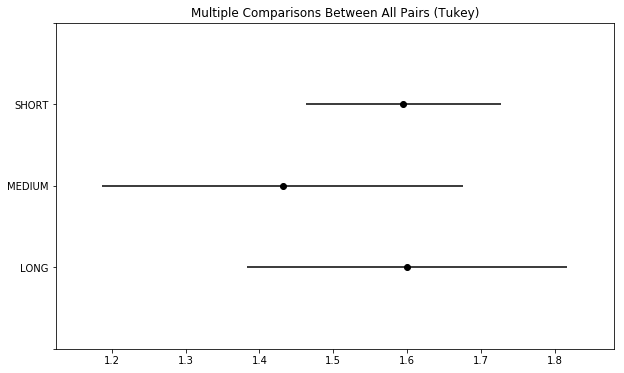

In [21]:
#CS FOR JOURNEY LENGTH

tukey_jl_c = pairwise_tukeyhsd(endog=df_jl_c['AVG_ACT'],     # Data
                          groups=df_jl_c['JOURNEY_LENGTH_GROUP'],   # Groups
                          alpha=0.05)          # Significance level

tukey_jl_c.plot_simultaneous()    # Plot group confidence intervals

tukey_jl_c.summary()              # See test summary

In [22]:
#CS FOR JOURNEY LENGTH

df_jl_c2 = """
    
    SELECT 
        JOURNEY_LENGTH_GROUP,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_jl_c
        
        GROUP BY 
            JOURNEY_LENGTH_GROUP; """

df_jl_c3 = (ps.sqldf(df_jl_c2, locals()))
df_jl_c3.head(5)

,JOURNEY_LENGTH_GROUP,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,LONG,115,184,1.600000,0.015851
1,MEDIUM,95,136,1.431579,0.004840
2,SHORT,432,689,1.594907,-0.003787


## Overall Latin America Average Marketing Attribution by JOURNEY STAGE in 2018 for Channel CS

In [23]:
#CS INTERACTIONS FOR JOURNEY STAGE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_j = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			JOURNEY_STAGE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND PLAN IN ('Cloud','Hybrid Cloud')
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				JOURNEY_STAGE; """, con=cnxn)

cnxn.close()
df_j.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,JOURNEY_STAGE,ACT_CT,AVG_ATTR
0,2856979.0,INTERACTION,Hybrid Cloud,Content Syndication,Early,1,0.020847
1,2856979.0,INTERACTION,Hybrid Cloud,Content Syndication,Middle,1,0.018825
2,3094903.0,INTERACTION,Hybrid Cloud,Content Syndication,Middle,3,0.040160
3,1849864.0,INTERACTION,Hybrid Cloud,Content Syndication,Early,2,0.013000
4,1939630.0,INTERACTION,Hybrid Cloud,Content Syndication,Middle,1,0.002553


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by JOURNEY STAGE

In [24]:
#CS FOR JOURNEY STAGE

df_j_cl = """
    
    SELECT 
        JOURNEY_ID,
        JOURNEY_STAGE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_j
        
        GROUP BY
            JOURNEY_ID,
            JOURNEY_STAGE; """

df_j_c = (ps.sqldf(df_j_cl, locals()))
df_j_c.head(5)

,JOURNEY_ID,JOURNEY_STAGE,TOT_ACT,AVG_ACT,ATTR
0,408525.0,Middle,1,1.0,-0.000183
1,1021711.0,Early,1,1.0,-0.000063
2,1021712.0,Early,1,1.0,-0.000063
3,1731348.0,Middle,2,2.0,0.010760
4,1734412.0,Late,1,1.0,-0.337365


group1,group2,meandiff,lower,upper,reject
Early,Late,0.7238,0.2115,1.2361,True
Early,Middle,1.4358,0.943,1.9286,True
Late,Middle,0.712,0.2583,1.1656,True


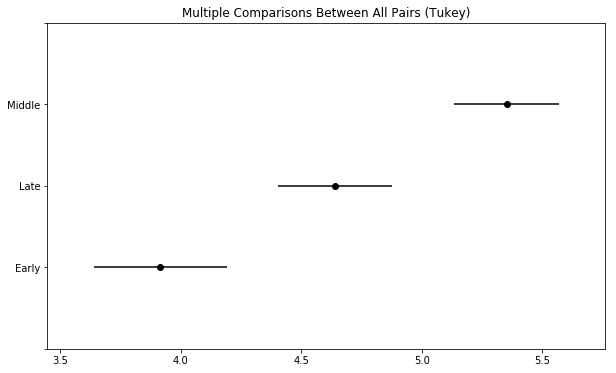

In [9]:
#EMAIL FOR JOURNEY STAGE:  SYSTEMS

tukey_j_s = pairwise_tukeyhsd(endog=df_j_s['AVG_ACT'],     # Data
                          groups=df_j_s['JOURNEY_STAGE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_j_s.plot_simultaneous()    # Plot group confidence intervals

tukey_j_s.summary()              # See test summary

In [25]:
#CS FOR JOURNEY STAGE

df_j_c2 = """
    
    SELECT 
        JOURNEY_STAGE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_j_c
        
        GROUP BY 
            JOURNEY_STAGE; """

df_j_c3 = (ps.sqldf(df_j_c2, locals()))
df_j_c3.head(5)

,JOURNEY_STAGE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Early,166,224,1.349398,-0.000119
1,Late,190,295,1.552632,-0.018590
2,Middle,332,490,1.475904,0.012805


## Overall Latin America Average Marketing Attribution by CLIENT TYPE in 2018 for Channel CS

In [26]:
#CS INTERACTIONS FOR CLIENT TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_c = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			CLIENT_TYPE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND PLAN IN ('Cloud','Hybrid Cloud')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				CLIENT_TYPE; """, con=cnxn)

cnxn.close()
df_c.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,CLIENT_TYPE,ACT_CT,AVG_ATTR
0,2889648.0,INTERACTION,Hybrid Cloud,Content Syndication,E,1,-0.000163
1,3178755.0,INTERACTION,Hybrid Cloud,Content Syndication,C,2,-0.009758
2,1802742.0,INTERACTION,Hybrid Cloud,Content Syndication,E,1,-0.001661
3,1879223.0,INTERACTION,Hybrid Cloud,Content Syndication,E,1,0.050975
4,3033779.0,INTERACTION,Hybrid Cloud,Content Syndication,C,1,0.062839


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by CLIENT TYPE

In [30]:
#CS FOR CLIENT TYPE

df_c_cl = """
    
    SELECT 
        JOURNEY_ID,
        CLIENT_TYPE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_c
        
        GROUP BY 
            JOURNEY_ID, 
            CLIENT_TYPE; """

df_c_c = (ps.sqldf(df_c_cl, locals()))
df_c_c.head(5)

,JOURNEY_ID,CLIENT_TYPE,TOT_ACT,AVG_ACT,ATTR
0,408525.0,E,1,1.0,-0.000183
1,1021711.0,E,1,1.0,-0.000063
2,1021712.0,E,1,1.0,-0.000063
3,1731348.0,C,2,2.0,0.010760
4,1734412.0,C,1,1.0,-0.337365


group1,group2,meandiff,lower,upper,reject
C,E,-0.0715,-0.3567,0.2137,False
C,I,-0.0484,-0.4408,0.3439,False
E,I,0.023,-0.3682,0.4143,False


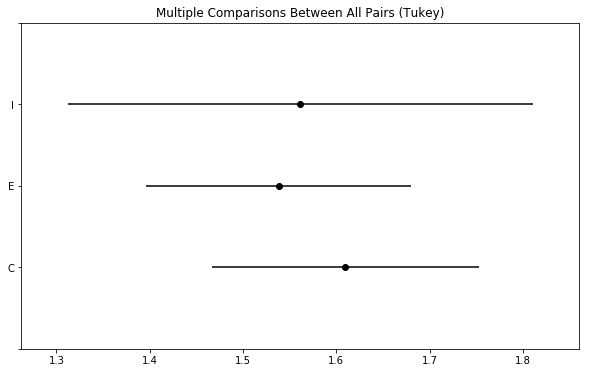

In [31]:
#CS FOR CLIENT TYPE

tukey_c_c = pairwise_tukeyhsd(endog=df_c_c['AVG_ACT'],     # Data
                          groups=df_c_c['CLIENT_TYPE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_c_c.plot_simultaneous()    # Plot group confidence intervals

tukey_c_c.summary()              # See test summary

In [32]:
#CS FOR CLIENT TYPE

df_c_c2 = """
    
    SELECT 
        CLIENT_TYPE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_c_c
        
        GROUP BY 
            CLIENT_TYPE; """

df_c_c3 = (ps.sqldf(df_c_c2, locals()))
df_c_c3.head(5)

,CLIENT_TYPE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,C,269,433,1.609665,0.001395
1,E,275,423,1.538182,0.001515
2,I,98,153,1.561224,-0.001483


## Overall Latin America Average Marketing Attribution by CLIENT FLAG in 2018 for Channel CS

In [33]:
#CS INTERACTIONS FOR CLIENT FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_f = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			CLIENT_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND PLAN IN ('Cloud','Hybrid Cloud')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				CLIENT_FLAG; """, con=cnxn)

cnxn.close()
df_f.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,CLIENT_FLAG,ACT_CT,AVG_ATTR
0,1745093.0,INTERACTION,Hybrid Cloud,Content Syndication,1,1,-0.006295
1,2006764.0,INTERACTION,Hybrid Cloud,Content Syndication,1,1,0.010379
2,2138064.0,INTERACTION,Hybrid Cloud,Content Syndication,0,1,0.033416
3,2856979.0,INTERACTION,Hybrid Cloud,Content Syndication,1,2,0.019836
4,3094903.0,INTERACTION,Hybrid Cloud,Content Syndication,1,3,0.040160


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by CLIENT FLAG

In [34]:
#CS FOR CLIENT FLAG

df_f_cl = """
    
    SELECT 
        JOURNEY_ID,
        CLIENT_FLAG,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_f
        
        GROUP BY 
            JOURNEY_ID, 
            CLIENT_FLAG; """

df_f_c = (ps.sqldf(df_f_cl, locals()))
df_f_c.head(5)

,JOURNEY_ID,CLIENT_FLAG,TOT_ACT,AVG_ACT,ATTR
0,408525.0,1,1,1.0,-0.000183
1,1021711.0,1,1,1.0,-0.000063
2,1021712.0,1,1,1.0,-0.000063
3,1731348.0,0,2,2.0,0.010760
4,1734412.0,1,1,1.0,-0.337365


In [35]:
#CS FOR CLIENT FLAG

ttest_f_cat1 = df_f_c[df_f_c['CLIENT_FLAG']==1]
ttest_f_cat2 = df_f_c[df_f_c['CLIENT_FLAG']==0]

ttest_ind(ttest_f_cat1['AVG_ACT'], ttest_f_cat2['AVG_ACT'])

Ttest_indResult(statistic=-0.7509355913522342, pvalue=0.45296743062154776)

In [36]:
#CS FOR CLIENT TYPE

df_f_c2 = """
    
    SELECT 
        CLIENT_FLAG,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_f_c
        
        GROUP BY 
            CLIENT_FLAG; """

df_f_c3 = (ps.sqldf(df_f_c2, locals()))
df_f_c3.head(5)

,CLIENT_FLAG,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,0,79,133,1.683544,0.020601
1,1,563,876,1.555950,-0.001742


## Overall Latin America Average Marketing Attribution by INDUSTRY in 2018 for Channel CS

In [37]:
#CS INTERACTIONS FOR INDUSTRY

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			INDUSTRY,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND PLAN IN ('Cloud','Hybrid Cloud')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				INDUSTRY; """, con=cnxn)

cnxn.close()
df_i.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,INDUSTRY,ACT_CT,AVG_ATTR
0,2935184.0,INTERACTION,Hybrid Cloud,Content Syndication,Banking,7,-0.018580
1,3201780.0,INTERACTION,Hybrid Cloud,Content Syndication,Telecommunications,1,-0.000741
2,2848879.0,INTERACTION,Hybrid Cloud,Content Syndication,Consumer Products,1,-0.015899
3,1940941.0,INTERACTION,Hybrid Cloud,Content Syndication,Financial Markets,1,0.001128
4,2003501.0,INTERACTION,Hybrid Cloud,Content Syndication,Automotive,7,0.006634


In [38]:
#CS FOR INDUSTRY

df_i_cl = """
    
    SELECT 
        JOURNEY_ID,
        INDUSTRY,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_i
        WHERE INDUSTRY IS NOT NULL
        
        GROUP BY 
            JOURNEY_ID, 
            INDUSTRY; """

df_i_c = (ps.sqldf(df_i_cl, locals()))
df_i_c.head(5)

,JOURNEY_ID,INDUSTRY,TOT_ACT,AVG_ACT,ATTR
0,408525.0,Banking,1,1.0,-0.000183
1,1021711.0,"Government, State/Provincial/Local",1,1.0,-0.000063
2,1021712.0,"Government, State/Provincial/Local",1,1.0,-0.000063
3,1731348.0,Computer Services,2,2.0,0.010760
4,1734412.0,Computer Services,1,1.0,-0.337365


group1,group2,meandiff,lower,upper,reject
Automotive,Banking,-0.0531,-1.4843,1.3781,False
Automotive,Chemicals & Petroleum,-0.3095,-2.0557,1.4366,False
Automotive,Computer Services,-0.3787,-1.8995,1.142,False
Automotive,Consumer Products,0.2033,-1.4744,1.8809,False
Automotive,Education,0.1349,-1.5318,1.8017,False
Automotive,Electronics,0.0238,-2.4456,2.4932,False
Automotive,Energy & Utilities,-0.6429,-2.389,1.1033,False
Automotive,Financial Markets,0.0238,-1.9671,2.0147,False
Automotive,"Government, Central/Federal",0.539,-1.5001,2.578,False
Automotive,"Government, State/Provincial/Local",0.2202,-1.2564,1.6967,False


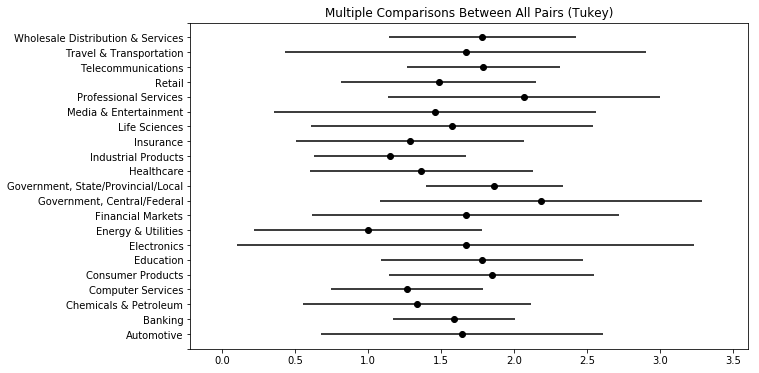

In [39]:
#CS FOR INDUSTRY

tukey_i_c = pairwise_tukeyhsd(endog=df_i_c['AVG_ACT'],     # Data
                          groups=df_i_c['INDUSTRY'],   # Groups
                          alpha=0.05)          # Significance level

tukey_i_c.plot_simultaneous()    # Plot group confidence intervals

tukey_i_c.summary()              # See test summary

In [40]:
#CS FOR INDUSTRY

df_i_c2 = """
    
    SELECT 
        INDUSTRY,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_i_c
        
        GROUP BY 
            INDUSTRY; """

df_i_c3 = (ps.sqldf(df_i_c2, locals()))
df_i_c3.head(30)

,INDUSTRY,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Automotive,14,23,1.642857,0.007716
1,Banking,117,186,1.589744,-0.001927
2,Chemicals & Petroleum,21,28,1.333333,-0.001404
3,Computer Services,53,67,1.264151,0.001509
4,Consumer Products,26,48,1.846154,0.024058
5,Education,27,48,1.777778,-0.004852
6,Electronics,6,10,1.666667,0.014794
7,Energy & Utilities,21,21,1.000000,-0.024096
8,Financial Markets,12,20,1.666667,-0.005244
9,"Government, Central/Federal",11,24,2.181818,-0.012579


## Overall Latin America Average Marketing Attribution by ASSET TYPE in 2018 for Channel CS

In [3]:
#CS INTERACTIONS FOR ASSET TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_a = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
			ASSET_TYPE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
			AND PLAN IN ('Cloud','Hybrid Cloud')
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY 
				JOURNEY_ID,
				ASSET_TYPE; """, con=cnxn)

cnxn.close()
df_a.head(5)

,JOURNEY_ID,ASSET_TYPE,ACT_CT,AVG_ATTR
0,18718.0,Widget Download,2,0.000110
1,85191.0,None,1,0.009336
2,118007.0,White paper,3,0.000257
3,242005.0,White paper,1,-0.016049
4,340053.0,Widget Download,1,0.000316


In [6]:
#CS FOR ASSET TYPE

df_a_cl = """
    
    SELECT 
        JOURNEY_ID,
        ASSET_TYPE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_a
        WHERE ASSET_TYPE IS NOT NULL
        
        GROUP BY
            JOURNEY_ID,
            ASSET_TYPE; """

df_a_c = (ps.sqldf(df_a_cl, locals()))
df_a_c.head(5)

,JOURNEY_ID,ASSET_TYPE,TOT_ACT,AVG_ACT,ATTR
0,195.0,White paper,2,2.0,0.001179
1,240.0,White paper,1,1.0,-0.005521
2,1179.0,White paper,1,1.0,0.002461
3,1387.0,Analyst Research,1,1.0,0.002163
4,1524.0,White paper,9,9.0,0.000221


group1,group2,meandiff,lower,upper,reject
Analyst Research,Assessment,-0.3508,-2.2576,1.5559,False
Analyst Research,Call Request Fulfillment,-0.3508,-1.1621,0.4604,False
Analyst Research,Catalog,-0.3508,-1.4348,0.7331,False
Analyst Research,Customer Case Study,-0.208,-1.5612,1.1452,False
Analyst Research,Data Sheet,-0.3422,-0.6574,-0.027,True
Analyst Research,Executive Brief,-0.3508,-5.3798,4.6782,False
Analyst Research,Flyer,-0.3508,-5.3798,4.6782,False
Analyst Research,Follow-up Call,-0.3508,-2.8693,2.1676,False
Analyst Research,Infographic,-0.3508,-2.2576,1.5559,False
Analyst Research,Information Kit,-0.3508,-5.3798,4.6782,False


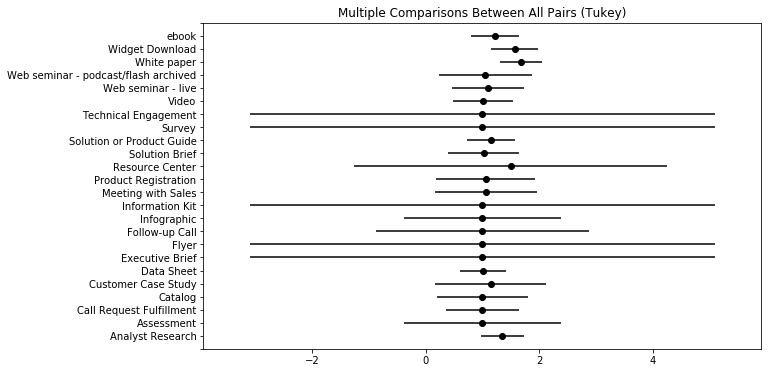

In [7]:
#CS FOR JOURNEY LENGTH

tukey_a_c = pairwise_tukeyhsd(endog=df_a_c['AVG_ACT'],     # Data
                          groups=df_a_c['ASSET_TYPE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_a_c.plot_simultaneous()    # Plot group confidence intervals

tukey_a_c.summary()              # See test summary

In [10]:
#CS FOR ASSET TYPE

df_a_c2 = """
    
    SELECT 
        ASSET_TYPE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_a_c
        
        GROUP BY 
            ASSET_TYPE; """

df_a_c3 = (ps.sqldf(df_a_c2, locals()))
df_a_c3.head(30)

,ASSET_TYPE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Analyst Research,952,1286,1.350840,0.002936
1,Assessment,7,7,1.000000,0.002237
2,Call Request Fulfillment,40,40,1.000000,0.005278
3,Catalog,22,22,1.000000,-0.002611
4,Customer Case Study,14,16,1.142857,0.003376
5,Data Sheet,347,350,1.008646,0.003169
6,Executive Brief,1,1,1.000000,-0.000008
7,Flyer,1,1,1.000000,0.000251
8,Follow-up Call,4,4,1.000000,-0.015681
9,Infographic,7,7,1.000000,0.005762
